In [ ]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from statsmodels.distributions.empirical_distribution import ECDF
import calendar

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
stores = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/store.csv')
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train(2).csv', low_memory=False)
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test(1).csv')

In [ ]:
display(train.head())
print("----------------------------\n")
display(train.info())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31/07/2015,5263,555,1,1,0,1
1,2,5,31/07/2015,6064,625,1,1,0,1
2,3,5,31/07/2015,8314,821,1,1,0,1
3,4,5,31/07/2015,13995,1498,1,1,0,1
4,5,5,31/07/2015,4822,559,1,1,0,1


----------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


None

## Exploratory data analysis

### On Train Data

In [ ]:
display(train.describe())
print("----------------------------")

#Check if there are any duplicate rows
print("Number of duplicate rows are: %d" % train.duplicated().sum())
print("----------------------------")


#Dropping columns that has same values for all observations
same_columns=[]
for column in train.columns:
    if train[column].unique().size == 1:
        print(column + " has all the same values")
        same_columns.append(column)
if(len(same_columns) == 0):
    print("No column has the same value for all the observations. Nothing to remove.")
else:
    train = train.drop(same_columns, axis=1)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


----------------------------
Number of duplicate rows are: 0
----------------------------
No column has the same value for all the observations. Nothing to remove.


In [ ]:
# Converting datatype of Date column to date time for better pre-processing
train['Date'] = pd.to_datetime(train['Date'], format = '%d/%m/%Y', errors = 'coerce')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [ ]:
train = train.set_index('Date')
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [ ]:
#Extracting day, month and year from date time
train['Date_year'] = train.index.year
train['Date_month'] = train.index.month
train['Date_day'] = train.index.day
train['Date_WeekOfYear'] = train.index.isocalendar().week.astype(np.int64)

train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Date_year,Date_month,Date_day,Date_WeekOfYear
Date,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31
2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31
2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31
2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31


In [ ]:
train[["Date_year","Date_month","Date_day","Date_WeekOfYear"]].head()

,Date_year,Date_month,Date_day,Date_WeekOfYear
Date,,,,
2015-07-31,2015,7,31,31
2015-07-31,2015,7,31,31
2015-07-31,2015,7,31,31
2015-07-31,2015,7,31,31
2015-07-31,2015,7,31,31


In [ ]:
display(train.describe().T.style.background_gradient(cmap='BuGn'))

,count,mean,std,min,25%,50%,75%,max
Store,1017209.000000,558.429727,321.908651,1.000000,280.000000,558.000000,838.000000,1115.000000
DayOfWeek,1017209.000000,3.998341,1.997391,1.000000,2.000000,4.000000,6.000000,7.000000
Sales,1017209.000000,5773.818972,3849.926175,0.000000,3727.000000,5744.000000,7856.000000,41551.000000
Customers,1017209.000000,633.145946,464.411734,0.000000,405.000000,609.000000,837.000000,7388.000000
Open,1017209.000000,0.830107,0.375539,0.000000,1.000000,1.000000,1.000000,1.000000
Promo,1017209.000000,0.381515,0.485759,0.000000,0.000000,0.000000,1.000000,1.000000
SchoolHoliday,1017209.000000,0.178647,0.383056,0.000000,0.000000,0.000000,0.000000,1.000000
Date_year,1017209.000000,2013.832292,0.777396,2013.000000,2013.000000,2014.000000,2014.000000,2015.000000
Date_month,1017209.000000,5.846762,3.326097,1.000000,3.000000,6.000000,8.000000,12.000000
Date_day,1017209.000000,15.702790,8.787638,1.000000,8.000000,16.000000,23.000000,31.000000


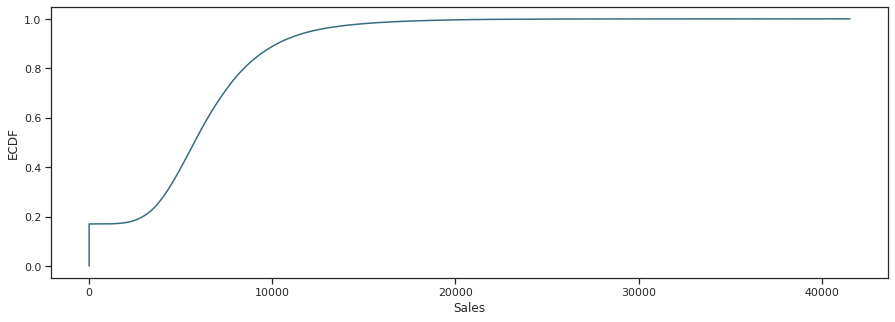

In [ ]:
sns.set(style = "ticks")# to format into seaborn
c = '#386B7F' # basic color for plots
f = plt.figure(figsize=(15, 11))

ax1 = f.add_subplot(2,1, 1)
cdf = ECDF(train['Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Sales'); plt.ylabel('ECDF');
# 20% of the total data has 0 sales and customers. Let us explore more on that

In [ ]:
# Analyse 0 sales
print("Days with 0 sales: %d" % (train[(train.Sales == 0)].shape[0]))
print("----------------------------")

print("Days with 0 sales where the stores were closed: %d" %train[(train.Open == 0) & (train.Sales == 0)].shape[0])
print("----------------------------")

print("Days with 0 sales where the stores were opened: %d" %train[(train.Open != 0) & (train.Sales == 0)].shape[0])
print("----------------------------")

print("Days with some sales where the stores were closed: %d" %train[(train.Open == 0) & (train.Sales != 0)].shape[0])

Days with 0 sales: 172871
----------------------------
Days with 0 sales where the stores were closed: 172817
----------------------------
Days with 0 sales where the stores were opened: 54
----------------------------
Days with some sales where the stores were closed: 0


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# We can remove days with 0 sales where the stores were closed so that no bias is created
# 0 sales is obvious when the store is closed
train = train[(train.Open != 0) & (train.Sales != 0)]
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 844338 entries, 2015-07-31 to 2013-01-01
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Store            844338 non-null  int64 
 1   DayOfWeek        844338 non-null  int64 
 2   Sales            844338 non-null  int64 
 3   Customers        844338 non-null  int64 
 4   Open             844338 non-null  int64 
 5   Promo            844338 non-null  int64 
 6   StateHoliday     844338 non-null  object
 7   SchoolHoliday    844338 non-null  int64 
 8   Date_year        844338 non-null  int64 
 9   Date_month       844338 non-null  int64 
 10  Date_day         844338 non-null  int64 
 11  Date_WeekOfYear  844338 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 83.7+ MB


#### Sales and Cutomers vs Promo

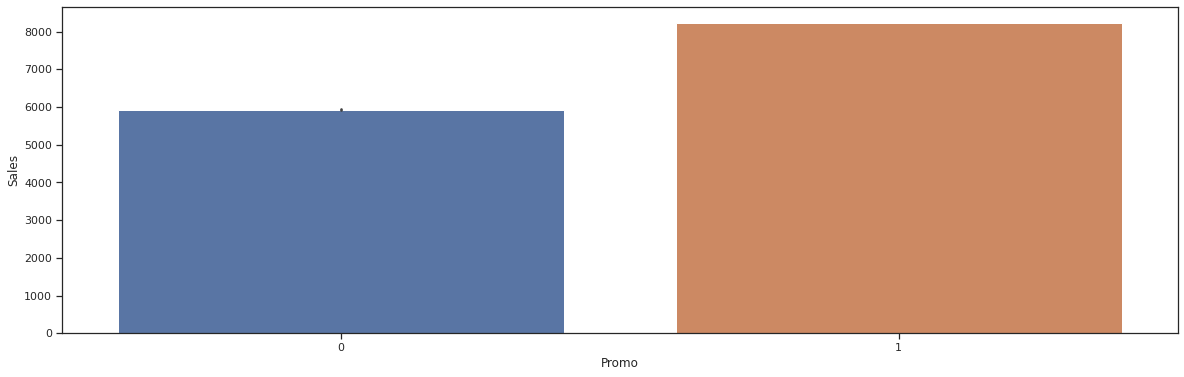

In [ ]:
f = plt.figure(figsize=(20, 6))
sns.barplot(x = 'Promo', y='Sales', data=train)
# Sales increase during promo; there is a positive relationship

#### Sales and Cutomers vs Month, Year and Day

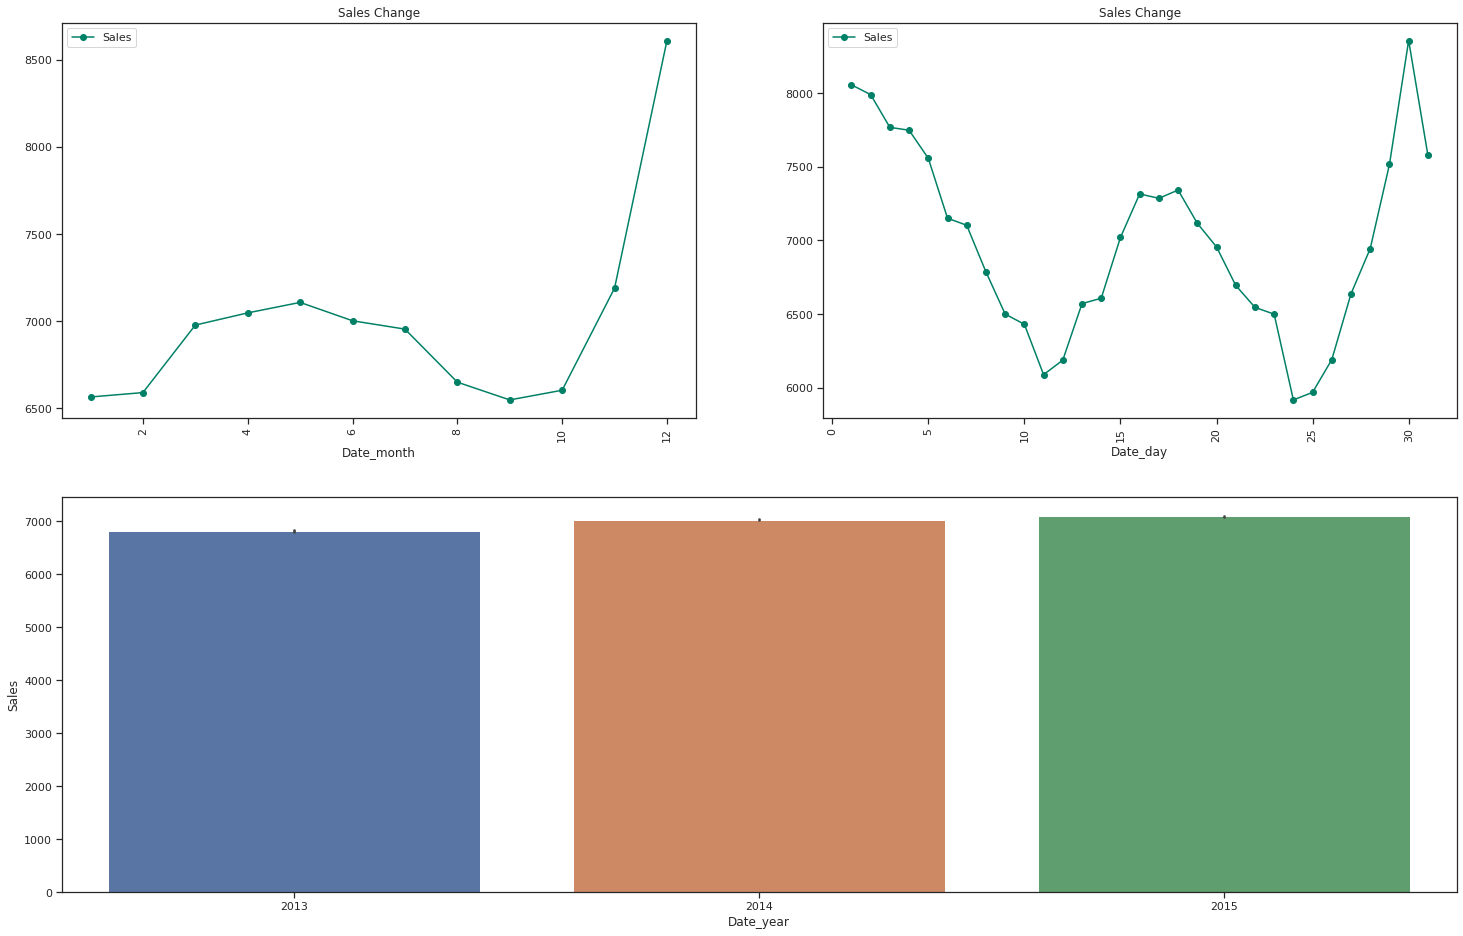

In [ ]:
f = plt.figure(figsize=(25, 16))

f.add_subplot(2, 2, 1)
train.groupby('Date_month')["Sales"].mean().plot(legend=True,marker='o',rot=90,colormap="summer",title="Sales Change")
# Sales show steep increase during the months of November & December; probably due to christmas & new years?

f.add_subplot(2, 2, 2)
train.groupby('Date_day')["Sales"].mean().plot(legend=True,marker='o',rot=90,colormap="summer",title="Sales Change")

f.add_subplot(2, 1, 2)
sns.barplot(x = 'Date_year', y = "Sales", data = train)
# Not much difference across years; can drop the column?

#### Sales and Cutomers vs Day of the week

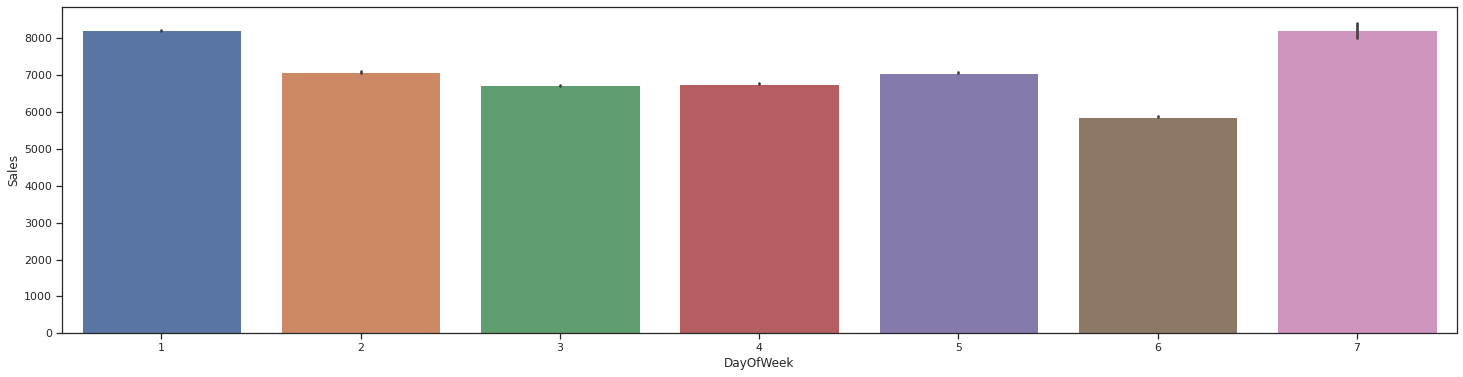

In [ ]:
f = plt.figure(figsize=(25, 6))
sns.barplot(x = 'DayOfWeek', y='Sales', data=train)

#### Sales and Cutomers vs Holidays

In [ ]:
train['StateHoliday'].value_counts()

0    843428
a       694
b       145
c        71
Name: StateHoliday, dtype: int64

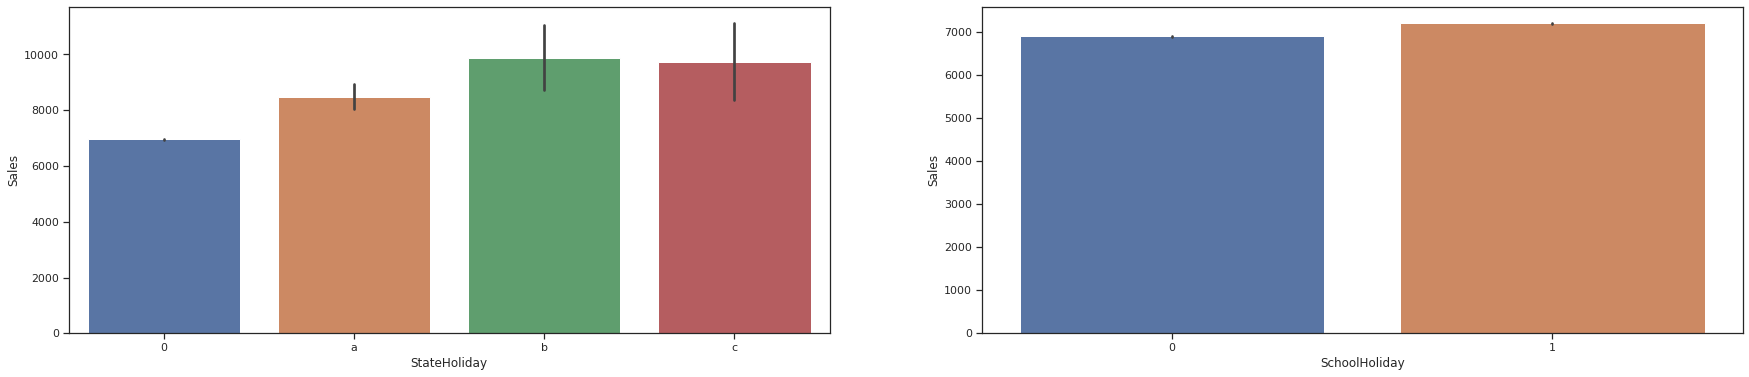

In [ ]:
f = plt.figure(figsize=(30, 6))

f.add_subplot(1, 2, 1)
sns.barplot(x='StateHoliday', y='Sales', data=train)
# Sales high when its not a a state holiday; probably because majority of the stores are closed

#Impute a, b, c to 1 because little to no differenece in sales based on which state holiday it is
train["StateHoliday"] = train["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

f.add_subplot(1, 2, 2)
sns.barplot(x='SchoolHoliday', y='Sales', data=train)
# School holiday does not have much affect although a slight difference is observed

#### Are stores open all week?

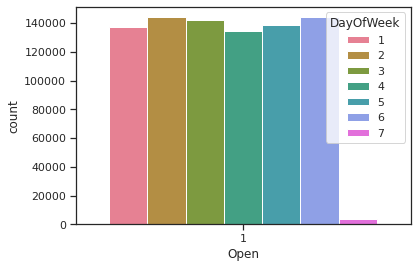

In [ ]:
sns.countplot(x='Open',hue='DayOfWeek', data=train, palette="husl")

### On Store data

In [ ]:
#Analysis on stores data
stores.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
# missing values in store data
stores.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


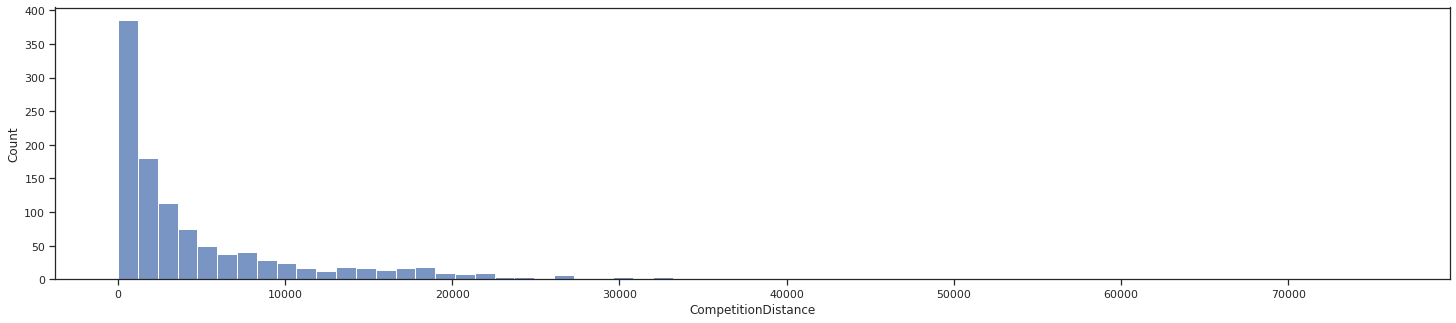

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


None

In [ ]:
# Lets try to identify any patterns in these missing values for CompetitionDistance
display(stores[pd.isnull(stores['CompetitionDistance'])])

plt.figure(figsize=(25, 5))
sns.histplot(stores.CompetitionDistance)
plt.show()


stores['CompetitionDistance'].fillna(stores['CompetitionDistance'].max(), inplace = True)
display(stores.info())

In [ ]:
print("Uniques values for CompetitionOpenSinceMonth before imputation")
print(sorted(stores.CompetitionOpenSinceMonth.unique()))
print("----------------------------")
print("Uniques values for CompetitionOpenSinceYear before imputation")
print(sorted(stores.CompetitionOpenSinceYear.unique()))

# Impute NaN in these columns with mode value because every store will have a competition
stores['CompetitionOpenSinceMonth'].fillna(stores['CompetitionOpenSinceMonth'].mode(), inplace = True)
stores['CompetitionOpenSinceYear'].fillna(stores['CompetitionOpenSinceYear'].mode(), inplace = True)

Uniques values for CompetitionOpenSinceMonth before imputation
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, nan]
----------------------------
Uniques values for CompetitionOpenSinceYear before imputation
[1900.0, 1961.0, 1990.0, 1994.0, 1995.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, nan]


In [ ]:
promo2SinceWeek_allzeroes = stores[pd.isnull(stores['Promo2SinceWeek'])]
print("Number of records where Promo2SinceWeek is null but Promo2 is not 0: %d" %
      promo2SinceWeek_allzeroes[promo2SinceWeek_allzeroes['Promo2']!=0].shape[0] )

promo2SinceYear_allzeroes = stores[pd.isnull(stores['Promo2SinceYear'])]
print("Number of records where Promo2SinceYear is null but Promo2 is not 0: %d" %
      promo2SinceYear_allzeroes[promo2SinceYear_allzeroes['Promo2']!=0].shape[0] )

promoInterval_allzeroes = stores[pd.isnull(stores['PromoInterval'])]
print("Number of records where PromoInterval is null but Promo2 is not 0: %d" %
      promoInterval_allzeroes[promoInterval_allzeroes['Promo2']!=0].shape[0] )

# Promo2SinceWeek, Promo2SinceYear and PromoInterval are NaN only when Promo2 = 0 i.e., the store is not participating in promotion
# Impute these columns with 0s

Number of records where Promo2SinceWeek is null but Promo2 is not 0: 0
Number of records where Promo2SinceYear is null but Promo2 is not 0: 0
Number of records where PromoInterval is null but Promo2 is not 0: 0


In [ ]:
# replace NA's by 0
stores.fillna(0, inplace = True)
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
#Type conversion for numerical columns
for column in ['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']:
    stores[column] = stores[column].astype(np.int64)
stores.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270,9,2008,0,0.0,0.0,0
1,2,a,a,570,11,2007,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130,12,2006,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620,9,2009,0,0.0,0.0,0
4,5,a,a,29910,4,2015,0,0.0,0.0,0


In [ ]:
print("Joining train set with store information.")
train_store = pd.merge(train, stores, how = 'left', on = 'Store')
train_store.info()

Joining train set with store information.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 844337
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844338 non-null  int64  
 1   DayOfWeek                  844338 non-null  int64  
 2   Sales                      844338 non-null  int64  
 3   Customers                  844338 non-null  int64  
 4   Open                       844338 non-null  int64  
 5   Promo                      844338 non-null  int64  
 6   StateHoliday               844338 non-null  int64  
 7   SchoolHoliday              844338 non-null  int64  
 8   Date_year                  844338 non-null  int64  
 9   Date_month                 844338 non-null  int64  
 10  Date_day                   844338 non-null  int64  
 11  Date_WeekOfYear            844338 non-null  int64  
 12  StoreType                  844338 non-null  

## Exploring merged dataset

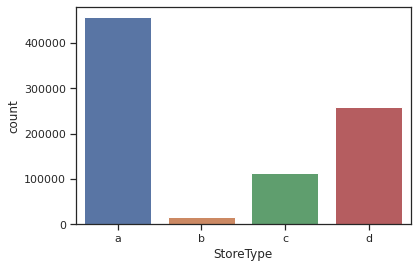

In [ ]:
train_store.groupby('StoreType')['Sales'].describe()

sns.countplot(x='StoreType', data=train_store, order=['a','b','c', 'd'])

StoreType B has the highest average of Sales among all others, however we have much less data for it

<ipython-input-30-5429f9466821>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  f.add_subplot(1, 2, 1)
<ipython-input-30-5429f9466821>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  f.add_subplot(1, 2, 2)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Date_year,Date_month,...,Date_WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,...,31,c,1,1270,9,2008,0,0.0,0.0,0
1,2,5,6064,625,1,1,0,1,2015,7,...,31,a,1,570,11,2007,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,8314,821,1,1,0,1,2015,7,...,31,a,1,14130,12,2006,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,13995,1498,1,1,0,1,2015,7,...,31,c,3,620,9,2009,0,0.0,0.0,0
4,5,5,4822,559,1,1,0,1,2015,7,...,31,a,1,29910,4,2015,0,0.0,0.0,0


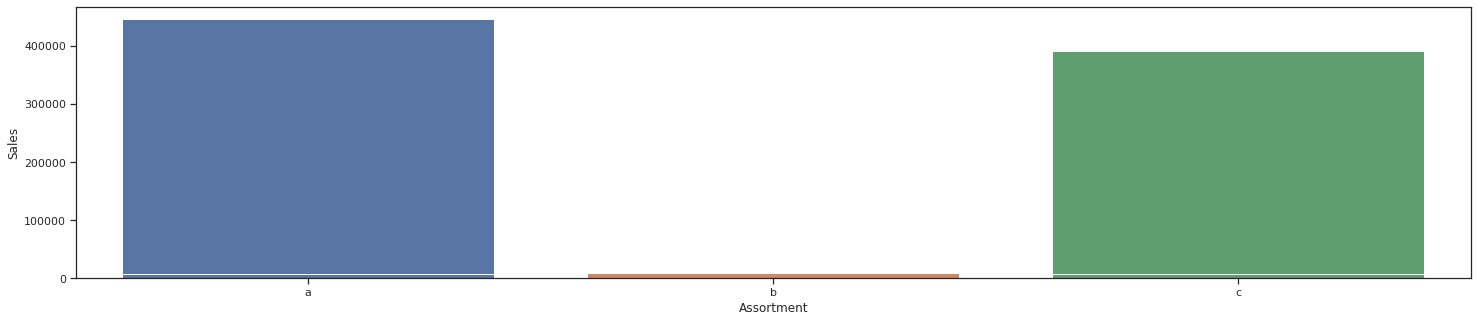

In [ ]:
sns.barplot(x='Assortment', y='Sales', data=train_store, order=['a','b','c'])
plt.show()
#Converting Assortment type to ordinal, numerical variables
train_store["Assortment"] = train_store["Assortment"].map({"a": 1, "b": 2, "c": 3})

display(train_store.head())


In [ ]:
plt.figure(figsize=(25, 5))
sns.countplot(x='Assortment', data=train_store, order=['a','b','c'])

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


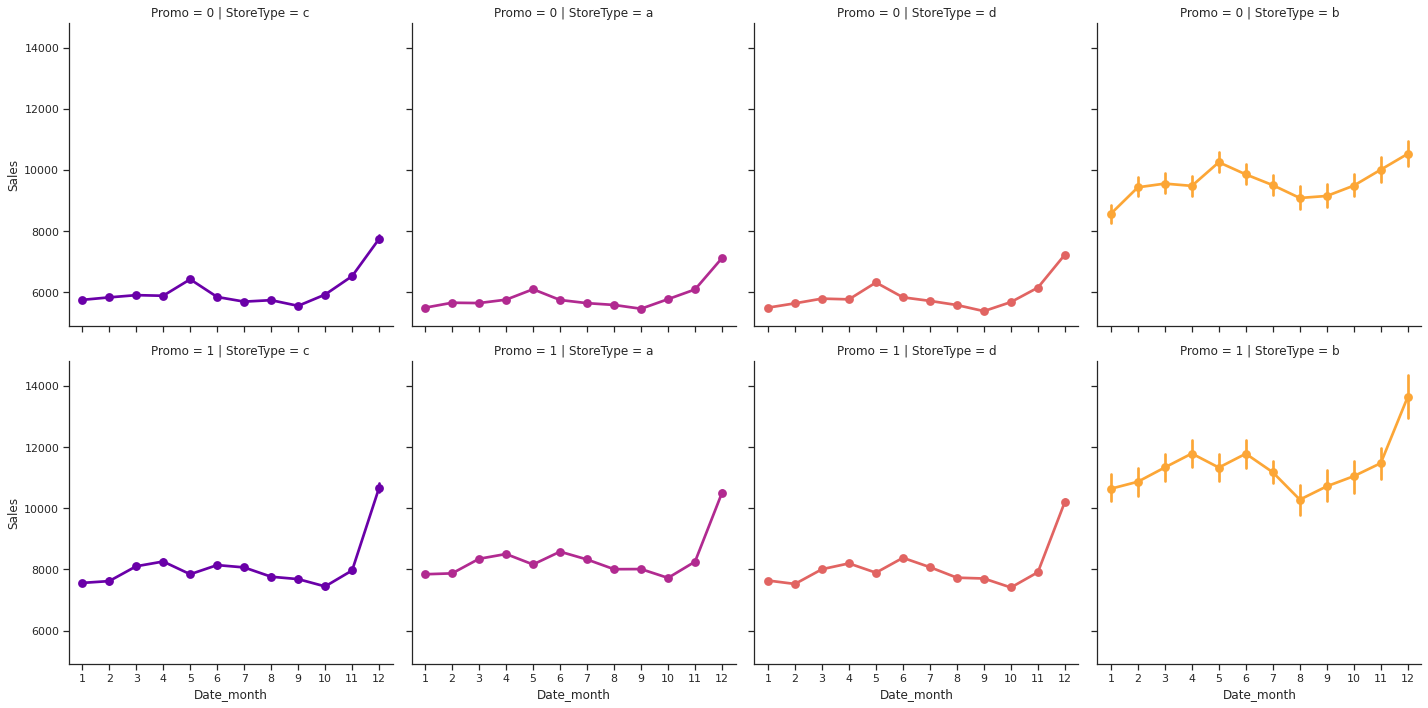

In [ ]:
# sale per customer trends
sns.factorplot(data = train_store, x = 'Date_month', y = "Sales",
               col = 'StoreType',
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo',
               color = c)

In [ ]:
# We need to understand for how long the competition and promo was open (in terms of months); adding those columns
train_store['CompetitionOpenSince'] = 12 * (train_store.Date_year - train_store.CompetitionOpenSinceYear) + (train_store.Date_month - train_store.CompetitionOpenSinceMonth)
train_store['CompetitionOpenSince'] = train_store.apply(lambda x: 0 if (x['CompetitionOpenSinceYear'] == 0 or x['CompetitionOpenSince'] < 0) else x['CompetitionOpenSince'], axis = 1)

In [ ]:
train_store['SeasonalPromoOpenSince'] = 52 * (train_store.Date_year - train_store.Promo2SinceYear) + (train_store.Date_WeekOfYear - train_store.Promo2SinceWeek)
train_store['SeasonalPromoOpenSince'] = train_store.apply(lambda x: 0 if (x['Promo2SinceYear'] == 0 or x['SeasonalPromoOpenSince'] < 0) else x['SeasonalPromoOpenSince'], axis = 1)

In [ ]:
display(train_store.head())

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Date_year,Date_month,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSince,SeasonalPromoOpenSince
0,1,5,5263,555,1,1,0,1,2015,7,...,1,1270,9,2008,0,0.0,0.0,0,82,0.0
1,2,5,6064,625,1,1,0,1,2015,7,...,1,570,11,2007,1,13.0,2010.0,"Jan,Apr,Jul,Oct",92,278.0
2,3,5,8314,821,1,1,0,1,2015,7,...,1,14130,12,2006,1,14.0,2011.0,"Jan,Apr,Jul,Oct",103,225.0
3,4,5,13995,1498,1,1,0,1,2015,7,...,3,620,9,2009,0,0.0,0.0,0,70,0.0
4,5,5,4822,559,1,1,0,1,2015,7,...,1,29910,4,2015,0,0.0,0.0,0,3,0.0


In [ ]:
train_store.loc[:, ['StoreType', 'Sales', 'Customers', 'SeasonalPromoOpenSince', 'CompetitionOpenSince']].groupby('StoreType').mean()

,Sales,Customers,SeasonalPromoOpenSince,CompetitionOpenSince
StoreType,,,,
a,6925.697986,795.422370,50.768916,44.265024
b,10233.380141,2022.211825,16.350450,38.432069
c,6933.126425,815.538073,61.790746,46.301050
d,6822.300064,606.353935,66.811654,36.185162


In [ ]:
train_store['Date_MonthName'] = train_store.apply(lambda x : calendar.month_abbr[x['Date_month']], axis=1)
train_store

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Date_year,Date_month,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSince,SeasonalPromoOpenSince,Date_MonthName
0,1,5,5263,555,1,1,0,1,2015,7,...,1270,9,2008,0,0.0,0.0,0,82,0.0,Jul
1,2,5,6064,625,1,1,0,1,2015,7,...,570,11,2007,1,13.0,2010.0,"Jan,Apr,Jul,Oct",92,278.0,Jul
2,3,5,8314,821,1,1,0,1,2015,7,...,14130,12,2006,1,14.0,2011.0,"Jan,Apr,Jul,Oct",103,225.0,Jul
3,4,5,13995,1498,1,1,0,1,2015,7,...,620,9,2009,0,0.0,0.0,0,70,0.0,Jul
4,5,5,4822,559,1,1,0,1,2015,7,...,29910,4,2015,0,0.0,0.0,0,3,0.0,Jul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,682,2,3375,566,1,0,1,1,2013,1,...,150,9,2006,0,0.0,0.0,0,76,0.0,Jan
844334,733,2,10765,2377,1,0,1,1,2013,1,...,860,10,1999,0,0.0,0.0,0,159,0.0,Jan
844335,769,2,5035,1248,1,0,1,1,2013,1,...,840,0,0,1,48.0,2012.0,"Jan,Apr,Jul,Oct",0,5.0,Jan
844336,948,2,4491,1039,1,0,1,1,2013,1,...,1430,0,0,0,0.0,0.0,0,0,0.0,Jan


In [ ]:
df_store4 = pd.DataFrame(stores[stores['Promo2'] == 1])
df_store4_list = df_store4['Store'].tolist()

In [ ]:
for i in df_store4_list:
    train_store.loc[
        (train_store['Store'] == i) &
        (train_store['SeasonalPromoOpenSince'] != 0) &
        (train_store['Date_MonthName'].isin(df_store4[df_store4['Store'] == i]['PromoInterval'].tolist()[0].split(','))), 'Promo2Restart'] = 1

train_store['Promo2Restart'] = train_store['Promo2Restart'].fillna(0)

In [ ]:
pd.set_option('display.max_columns', 100)
display(train_store[train_store['Promo2']==1].tail())

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Date_year,Date_month,Date_day,Date_WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSince,SeasonalPromoOpenSince,Date_MonthName,Promo2Restart
844324,274,2,3102,729,1,0,1,1,2013,1,1,1,b,2,3640,0,0,1,10.0,2013.0,"Jan,Apr,Jul,Oct",0,0.0,Jan,0.0
844325,335,2,2401,482,1,0,1,1,2013,1,1,1,b,1,90,0,0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",0,0.0,Jan,0.0
844326,353,2,3139,820,1,0,1,1,2013,1,1,1,b,2,900,0,0,1,14.0,2013.0,"Feb,May,Aug,Nov",0,0.0,Jan,0.0
844329,512,2,2646,625,1,0,1,1,2013,1,1,1,b,2,590,0,0,1,5.0,2013.0,"Mar,Jun,Sept,Dec",0,0.0,Jan,0.0
844335,769,2,5035,1248,1,0,1,1,2013,1,1,1,b,2,840,0,0,1,48.0,2012.0,"Jan,Apr,Jul,Oct",0,5.0,Jan,1.0


In [ ]:
train_store = train_store.drop(['Customers', 'Open', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Date_year',
                                'Date_day', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Date_MonthName', 'SchoolHoliday'],
                               axis = 1)
display(train_store.head())

,Store,DayOfWeek,Sales,Promo,StateHoliday,Date_month,Date_WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSince,SeasonalPromoOpenSince,Promo2Restart
0,1,5,5263,1,0,7,31,c,1,1270,82,0.0,0.0
1,2,5,6064,1,0,7,31,a,1,570,92,278.0,1.0
2,3,5,8314,1,0,7,31,a,1,14130,103,225.0,1.0
3,4,5,13995,1,0,7,31,c,3,620,70,0.0,0.0
4,5,5,4822,1,0,7,31,a,1,29910,3,0.0,0.0


In [ ]:
# Transforming StoreType
train_store["StoreType"] = train_store["StoreType"].map({"a": 1, "b": 2, "c": 3, "d": 4})

In [ ]:
display(train_store.head())

,Store,DayOfWeek,Sales,Promo,StateHoliday,Date_month,Date_WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSince,SeasonalPromoOpenSince,Promo2Restart
0,1,5,5263,1,0,7,31,3,1,1270,82,0.0,0.0
1,2,5,6064,1,0,7,31,1,1,570,92,278.0,1.0
2,3,5,8314,1,0,7,31,1,1,14130,103,225.0,1.0
3,4,5,13995,1,0,7,31,3,3,620,70,0.0,0.0
4,5,5,4822,1,0,7,31,1,1,29910,3,0.0,0.0


### Checking multi-collinearity

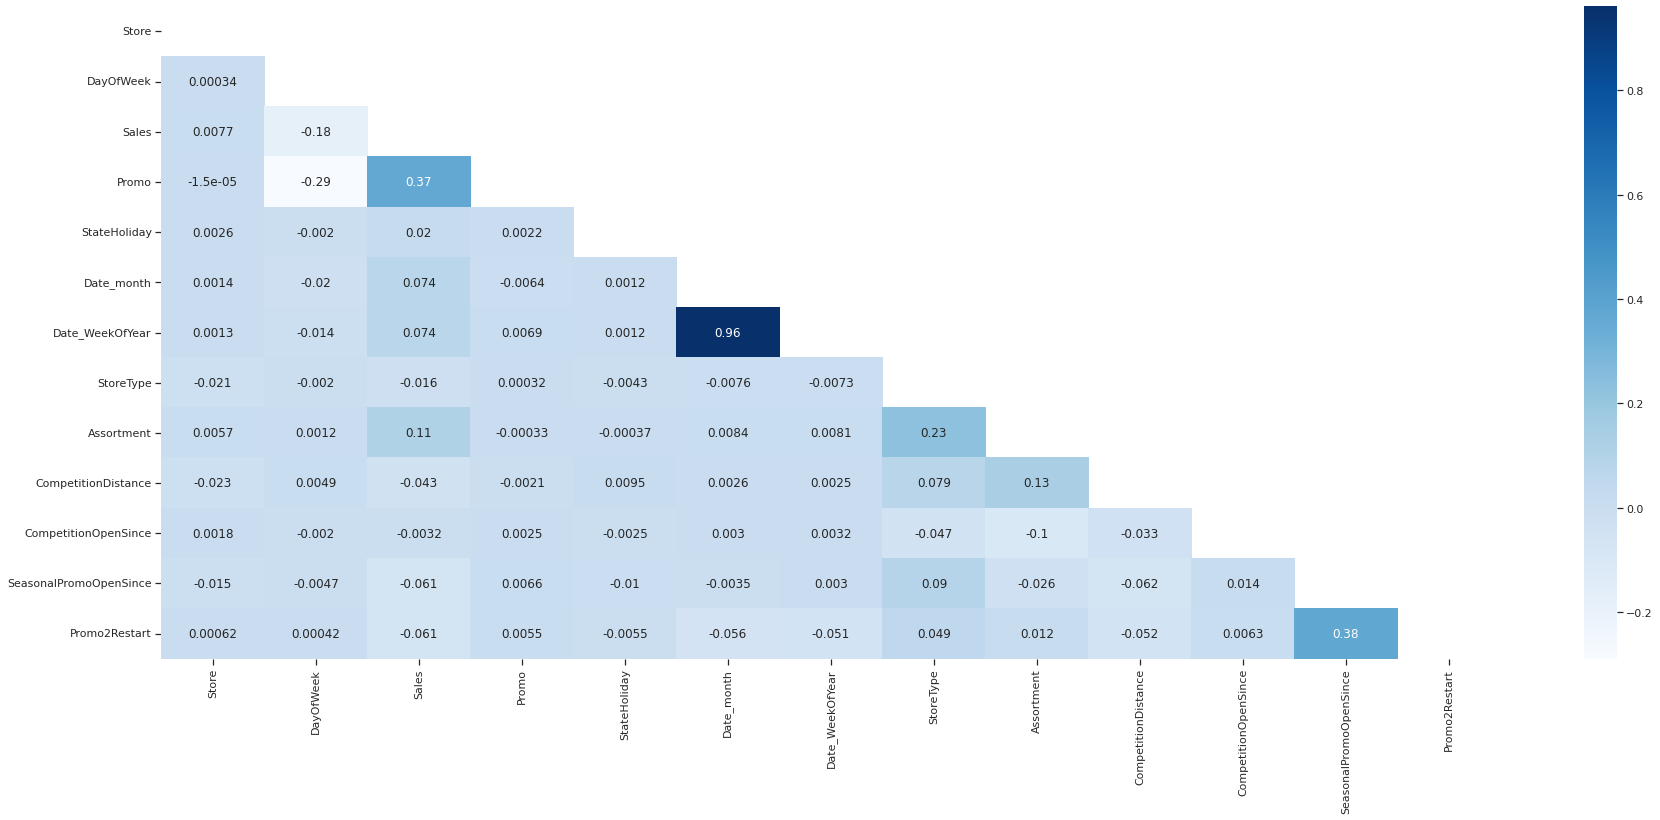

,Store,DayOfWeek,Sales,Promo,StateHoliday,Date_month,StoreType,Assortment,CompetitionDistance,CompetitionOpenSince,SeasonalPromoOpenSince,Promo2Restart
0,1,5,5263,1,0,7,3,1,1270,82,0.0,0.0
1,2,5,6064,1,0,7,1,1,570,92,278.0,1.0
2,3,5,8314,1,0,7,1,1,14130,103,225.0,1.0
3,4,5,13995,1,0,7,3,3,620,70,0.0,0.0
4,5,5,4822,1,0,7,1,1,29910,3,0.0,0.0


,Attribute,VIF Scores
0,Store,3.516818
1,DayOfWeek,4.125941
2,Sales,6.036815
3,Promo,2.177606
4,StateHoliday,1.001707
5,Date_month,3.674969
6,StoreType,3.632065
7,Assortment,4.903345
8,CompetitionDistance,1.457379
9,CompetitionOpenSince,1.388431


In [ ]:
f = plt.figure(figsize=(30, 12))

# Generate a mask for the upper triangle
mask = np.zeros_like(train_store.corr(), dtype = bool)
mask[np.triu_indices_from(mask)] = True

heat_mp = sns.heatmap(train_store.corr(), mask = mask, annot = True, cmap= 'Blues')
plt.show()

# Dropping unwanted columns
train_store = train_store.drop(['Date_WeekOfYear'],
                               axis = 1)
display(train_store.head())


#Calculate Variance Inflation Factor for identifying collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_scores = pd.DataFrame()
vif_scores["Attribute"] = train_store.columns
vif_scores["VIF Scores"] = [variance_inflation_factor(train_store.values, i) for i in range(len(train_store.columns))]

display(vif_scores)

### Transforming Months to quartiles

In [ ]:
train["Date_month"] = train["Date_month"].map({1: 1, 2: 1, 3: 1, 4: 2, 5: 2, 6: 2, 7: 3, 8: 3, 9: 3, 10: 4, 11: 4, 12: 4})
display(train["Date_month"])

Date
2015-07-31    3
2015-07-31    3
2015-07-31    3
2015-07-31    3
2015-07-31    3
             ..
2013-01-01    1
2013-01-01    1
2013-01-01    1
2013-01-01    1
2013-01-01    1
Name: Date_month, Length: 844338, dtype: int64

### One hot encoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder


enc = OneHotEncoder(sparse = False)
enc.fit(train_store[['StoreType', 'DayOfWeek', 'Date_month', 'Assortment']])
train_store[enc.get_feature_names_out()] = enc.transform(train_store[['StoreType', 'DayOfWeek', 'Date_month', 'Assortment']])


display(train_store)

,Store,DayOfWeek,Sales,Promo,StateHoliday,Date_month,StoreType,Assortment,CompetitionDistance,CompetitionOpenSince,SeasonalPromoOpenSince,Promo2Restart,StoreType_1,StoreType_2,StoreType_3,StoreType_4,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Date_month_1,Date_month_2,Date_month_3,Date_month_4,Date_month_5,Date_month_6,Date_month_7,Date_month_8,Date_month_9,Date_month_10,Date_month_11,Date_month_12,Assortment_1,Assortment_2,Assortment_3
0,1,5,5263,1,0,7,3,1,1270,82,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,5,6064,1,0,7,1,1,570,92,278.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,5,8314,1,0,7,1,1,14130,103,225.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,5,13995,1,0,7,3,3,620,70,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,5,4822,1,0,7,1,1,29910,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,682,2,3375,0,1,1,2,1,150,76,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
844334,733,2,10765,0,1,1,2,2,860,159,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
844335,769,2,5035,0,1,1,2,2,840,0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
844336,948,2,4491,0,1,1,2,2,1430,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Dropping unnecessary columns

In [ ]:
train_store = train_store.drop(['StoreType', 'DayOfWeek', 'Date_month', 'Assortment'], axis = 1)
display(train_store.head())

,Store,Sales,Promo,StateHoliday,CompetitionDistance,CompetitionOpenSince,SeasonalPromoOpenSince,Promo2Restart,StoreType_1,StoreType_2,StoreType_3,StoreType_4,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Date_month_1,Date_month_2,Date_month_3,Date_month_4,Date_month_5,Date_month_6,Date_month_7,Date_month_8,Date_month_9,Date_month_10,Date_month_11,Date_month_12,Assortment_1,Assortment_2,Assortment_3
0,1,5263,1,0,1270,82,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,6064,1,0,570,92,278.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,8314,1,0,14130,103,225.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,13995,1,0,620,70,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,4822,1,0,29910,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Doing transformations on test data

In [ ]:
#Performing same modifications on test data

# Transforming date
test['Date'] = pd.to_datetime(test['Date'], format = '%d/%m/%Y', errors = 'coerce')
test = test.set_index('Date')
#Extracting day, month and year from date time
test['Date_year'] = test.index.year
test['Date_month'] = test.index.month
test['Date_day'] = test.index.day
test['Date_WeekOfYear'] = test.index.isocalendar().week.astype(np.int64)

# Transforming StateHoliday
test["StateHoliday"] = test["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

# Merging test with stores
test_store = pd.merge(test, stores, how = 'left', on = 'Store')

# Transforming StoreType
test_store["StoreType"] = test_store["StoreType"].map({"a": 1, "b": 2, "c": 3, "d": 4})

# Mapping assortment types to numbers
test_store["Assortment"] = test_store["Assortment"].map({"a": 1, "b": 2, "c": 3})

# We need to understand for how long the competition and promo was open (in terms of months); adding those columns
test_store['CompetitionOpenSince'] = 12 * (test_store.Date_year - test_store.CompetitionOpenSinceYear) + (test_store.Date_month - test_store.CompetitionOpenSinceMonth)
test_store['CompetitionOpenSince'] = test_store.apply(lambda x: 0 if (x['CompetitionOpenSinceYear'] == 0 or x['CompetitionOpenSince'] < 0) else x['CompetitionOpenSince'], axis = 1)
test_store['SeasonalPromoOpenSince'] = 52 * (test_store.Date_year - test_store.Promo2SinceYear) + (test_store.Date_WeekOfYear - test_store.Promo2SinceWeek)
test_store['SeasonalPromoOpenSince'] = test_store.apply(lambda x: 0 if (x['Promo2SinceYear'] == 0 or x['SeasonalPromoOpenSince'] < 0) else x['SeasonalPromoOpenSince'], axis = 1)

# Feature engineering to get Promo2 related details
test_store['Date_MonthName'] = test_store.apply(lambda x : calendar.month_abbr[x['Date_month']], axis=1)
for i in df_store4_list:
    test_store.loc[
        (test_store['Store'] == i) &
        (test_store['SeasonalPromoOpenSince'] != 0) &
        (test_store['Date_MonthName'].isin(df_store4[df_store4['Store'] == i]['PromoInterval'].tolist()[0].split(','))), 'Promo2Restart'] = 1
test_store['Promo2Restart'] = test_store['Promo2Restart'].fillna(0)

# Dropping unwanted columns
test_store = test_store.drop(['Customers', 'Open', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Date_year','Date_WeekOfYear', 'SchoolHoliday',
                                'Date_day', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Date_MonthName'],
                               axis = 1)
display(test_store.head())

,Store,DayOfWeek,Sales,Promo,StateHoliday,Date_month,StoreType,Assortment,CompetitionDistance,CompetitionOpenSince,SeasonalPromoOpenSince,Promo2Restart
0,1,4,NaN,1,0,9,3,1,1270,84,0.0,0.0
1,3,4,NaN,1,0,9,1,1,14130,105,232.0,0.0
2,7,4,NaN,1,0,9,1,3,24000,29,0.0,0.0
3,8,4,NaN,1,0,9,1,1,7520,11,0.0,0.0
4,9,4,NaN,1,0,9,1,3,2030,181,0.0,0.0


## Modeling with XGBoost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [ ]:
x = train_store.drop(["Sales"], axis=1)
y = train_store["Sales"]
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.20)

### Using 80/20 Train-test split

In [ ]:
# data_dmatrix = xgb.DMatrix(data=x,label=y)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.2,
                max_depth = 10, alpha = 10, n_estimators = 1000)
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

In [ ]:
# rmse = np.sqrt(mean_squared_error(y_test, preds))
# print("RMSE: %f" % (rmse))
rmspe = (np.sqrt(np.mean(np.square((y_test - preds) / (y_test))))) * 100
print("RMSPE: %f" % (rmspe))

RMSPE: 15.123095


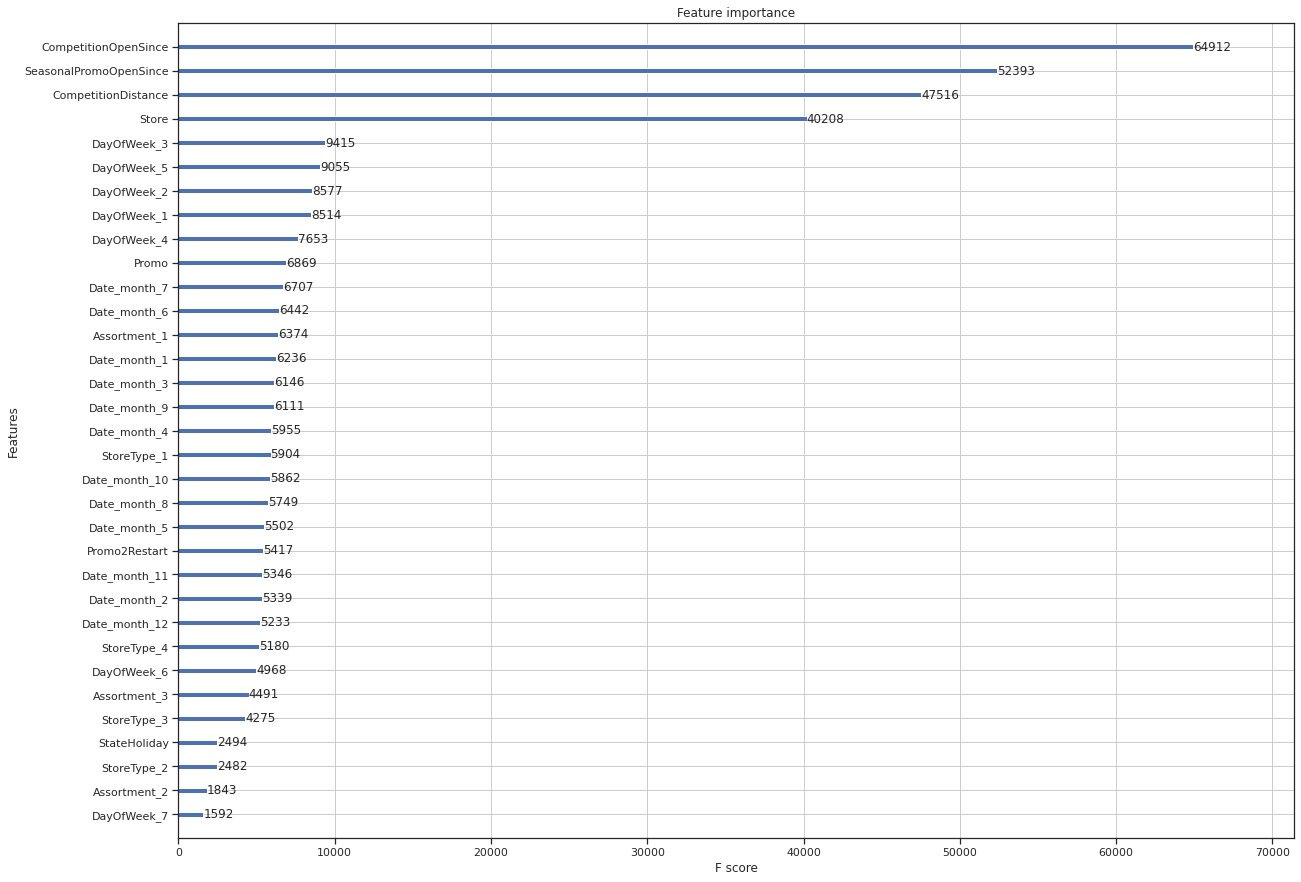

In [ ]:
from xgboost import plot_importance
from matplotlib import pyplot

pyplot.rcParams["figure.figsize"] = (20,15)
plot_importance(xg_reg)
pyplot.show()